In [10]:
!pip install scikit-learn
import sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Contexto
Scikit learn viene con algunos conjuntos de datos estándar. Uno de ellos es el famoso conjunto de datos Iris, que fue presentado por primera vez por el estadístico Fisher.

Este conjunto de datos se usa para abordar un problema de clasificación simple en el que tenemos que predecir la especie (Setosa, Versicolor o Virginica) de una flor de iris, dado un conjunto de medidas (largo del sépalo, ancho del sépalo, largo del pétalo y ancho del pétalo) en centímetros.

El conjunto de datos de Iris tiene 150 instancias de flores de Iris para cada una de las cuales tenemos las cuatro medidas anteriores (características) y el código de especie (respuesta).
La respuesta tiene la forma de un código de especie (0,1 y 2 para Setosa, Versicolor y Virginica respectivamente). Esto nos facilita su uso en scikit learn, ya que de acuerdo con los requisitos anteriores, tanto los datos de características como los de respuesta deben ser numéricos.

## Requisitos de Scikit
La biblioteca de aprendizaje de scikit tiene los siguientes requisitos para los datos antes de que se puedan usar para entrenar un modelo:

Las características y la respuesta deben ser objetos separados.
Las características y la respuesta deben ser numéricas.
Las funciones y la respuesta deben ser matrices NumPy de tamaños compatibles (en términos de filas y columnas)

## Obtener el set de datos

In [11]:
from sklearn import datasets
iris= datasets.load_iris()

## Dividir datos en X e Y

In [12]:
# Guardar los features en X
X=iris.data
# Guardar los target en Y
y=iris.target

## Exploración de los datos

In [13]:
# Imprimimos los tipos de X e Y y validamos que cumplan con los requerimientos
print(" type of X:",type(X),"\n","type of y:",type(y))
# Imprimimos que X e Y cumplan con las dimensiones
print(" shape of X:",X.shape,"\n","shape of y:",y.shape)

 type of X: <class 'numpy.ndarray'> 
 type of y: <class 'numpy.ndarray'>
 shape of X: (150, 4) 
 shape of y: (150,)


Los X e y son del tipo numpy ndarray, donde X tiene 150 instancias con cuatro características e y es una matriz unidimensional con 150 valores.

¡Excelente! vemos que se cumplen los tres requisitos para usar X e y en scikit learn como matriz de características y vector de respuesta.

## Dividir los datos en train y test

In [14]:
# Importamos la libreria que se usa para dividir el set de datos
from sklearn.model_selection import train_test_split
# Como inicialmente dividimos en X e Y debemos hacer lo mismo con X e Y para train y test
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=123, stratify=y)

Hemos establecido el valor del parámetro test_size en esta función en 0,25. Esto significa que mantenemos el 25 % de los datos en el conjunto de prueba y usaremos el 75 % restante como el conjunto de entrenamiento en el que se entrenará el modelo. También hemos establecido un "estado aleatorio" arbitrario (o semilla) para que podamos reproducir nuestros resultados más adelante. Finalmente, hemos estratificado la muestra por la variable objetivo. Esto garantiza que nuestro conjunto de entrenamiento se parezca al conjunto de prueba, lo que hace que las métricas de evaluación sean más confiables.



## Construcción del modelo de clasificación

El ciclo de vida completo de la creación de un modelo de aprendizaje en scikit learn se puede dividir en términos generales en cinco pasos. Ahora repasaremos cada paso y usaremos el ejemplo del algoritmo de clasificación del vecino más cercano k en los datos del iris para la ilustración.

### Paso 1

Hay familias (o clases) de algoritmos que comparten algunos aspectos en la metodología. Por ejemplo, tanto los algoritmos de regresión lineal como los de regresión logística pertenecen a una familia denominada modelos lineales en scikit learn.

Para el alcance de este blog, solo nos centraremos en entrenar un clasificador kNN y ajustar sus parámetros.

In [15]:
# Importamos clasificador kNN 
from sklearn.neighbors import KNeighborsClassifier

### Paso 2

Crear una instancia del algoritmo para crear un "estimador" o "modelo" con hiperparámetros específicos

Tratamos con dos tipos de parámetros como parte de un modelo de aprendizaje: hiperparámetros y parámetros del modelo. Los hiperparámetros expresan información estructural sobre el modelo y, por lo general, los elige el desarrollador del modelo antes de que los datos se ajusten al modelo. Por otro lado, los parámetros de los modelos se pueden aprender y optimizar directamente a partir de los datos (para, por ejemplo, coeficientes de regresión).

In [29]:
# Creamos una instancia y le damos un K = 6
knn6 = KNeighborsClassifier(n_neighbors=6)

In [31]:
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
 metric_params=None, n_jobs=1, n_neighbors=6, p=2,
 weights='uniform')

KNeighborsClassifier(n_jobs=1, n_neighbors=6)

### Paso 3

Aquí hacemos el entrenamiento del modelo

In [33]:
knn6.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=6)

### Paso 4 

Predicción del modelo

In [40]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


####Clases
clase 0: Iris-Setosa
clase 1: Iris-Versicolor
clase 2: Iris-Virginica

Algunos comentarios:

Como dijimos anteriormente los columnas del dataset son



1.   Longitud del sépalo
2.   Ancho del sépalo
3.   Longitud del pétalo
4.   Ancho del pétalo

Por lo que antes de probar el set de datos original vamos a validar que nuestro modelo devuelva algo, por lo que vamos a crear un nuevo objeto que contega info para validar una respuesta. Ejemplo: [3,2,3.3,2.9]

In [39]:
# Generamos un dato de pruebas
X_new = [[3, 2, 3.3, 2.9]]
knn6.predict(X_new)
print(knn6.predict(X_new))
print(iris.target_names[knn6.predict(X_new)])

[1]
['versicolor']


Ahora hacemos las predicciones pero con el set de test

In [41]:
y_pred=knn6.predict(X_test)
print(y_pred)
print(iris.target_names[y_pred])
# Recordamos las clases
# clase 0: Iris-Setosa 
# clase 1: Iris-Versicolor 
# clase 2: Iris-Virginica

[2 0 1 2 0 0 1 2 1 0 1 0 2 2 1 2 0 0 0 0 0 0 1 2 0 2 2 1 2 1 1 2 1 1 2 1 2
 1]
['virginica' 'setosa' 'versicolor' 'virginica' 'setosa' 'setosa'
 'versicolor' 'virginica' 'versicolor' 'setosa' 'versicolor' 'setosa'
 'virginica' 'virginica' 'versicolor' 'virginica' 'setosa' 'setosa'
 'setosa' 'setosa' 'setosa' 'setosa' 'versicolor' 'virginica' 'setosa'
 'virginica' 'virginica' 'versicolor' 'virginica' 'versicolor'
 'versicolor' 'virginica' 'versicolor' 'versicolor' 'virginica'
 'versicolor' 'virginica' 'versicolor']


### Paso 5

Evaluación de los resultados

En los primeros cuatro pasos, desarrollamos un modelo e hicimos predicciones para los datos de prueba. Ahora pasamos a la etapa de evaluación del modelo, donde buscamos lograr lo siguiente con scikit learn:

* Cuantificar el rendimiento de nuestro modelo.
* Estimar el rendimiento de nuestro modelo con datos fuera de la muestra
* Seleccione el mejor conjunto de parámetros de ajuste para el modelo

Para medir la precisión de nuestro modelo y poder compararlo con otros modelos, necesitamos métricas que puedan comparar los valores predichos (y_pred) con los valores reales (y_test). Scikit learn nos facilita esta tarea en forma de matriz de confusión.

A menudo se utiliza una matriz de confusión para resumir los resultados de predicción de un modelo de clasificación. El número de predicciones correctas e incorrectas se presenta como valores de conteo desglosados ​​por cada etiqueta. Ahora construyamos una matriz de confusión para las predicciones hechas por nuestro clasificador:

In [21]:
# Importamos y mostramos la matriz de confusión
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[12  0  0]
 [ 0 12  1]
 [ 0  1 12]]


En la matriz anterior, podemos ver que el clasificador knn6 tiene ciertos detallesentre las dos últimas etiquetas, ya que hay valores distintos de cero presentes en las posiciones no diagonales. Sin embargo, la confusión está solo en dos de las 38 observaciones en los datos de prueba. Esto significa que 36 de las 38 predicciones han sido precisas. Esto se puede cuantificar en términos porcentuales a través de una métrica llamada puntuación de precisión , que también forma parte del submódulo de métricas en scikit learn:

In [22]:
# Importamos y validamosel accuracy
from sklearn.metrics import accuracy_score
print("accuracy score=",accuracy_score(y_test,y_pred),"\n")

accuracy score= 0.9473684210526315 



## Validación cruzada de K-fold en scikit learn

La validación cruzada K (esta K es diferente de la k del clasificador kNN) es una técnica estadística que consiste en dividir los datos en subconjuntos 'K' de igual tamaño. El modelo se entrena con los datos de los subconjuntos (K-1) y el subconjunto restante se utiliza como conjunto de datos de prueba para validar el modelo. Realizamos varias rondas del procedimiento anterior hasta que todos los subconjuntos K se utilizan para la validación una vez. Luego, combinamos los resultados de validación de estas rondas múltiples para obtener una estimación del rendimiento del modelo.
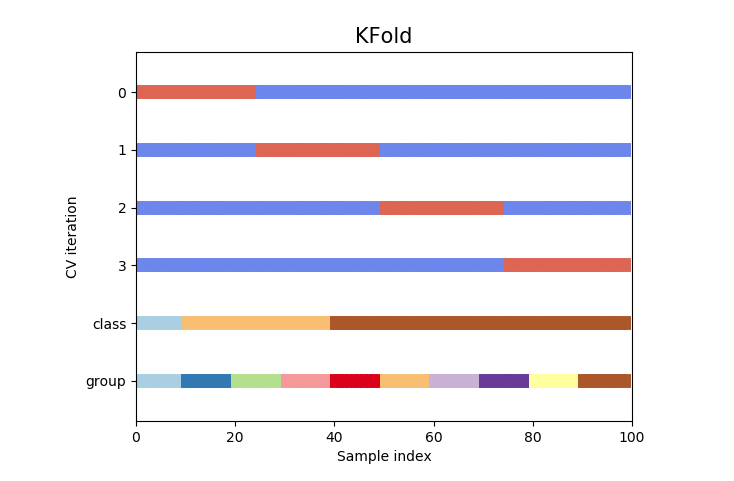

El procedimiento anterior reduce la variabilidad y, por lo tanto, la validación cruzada de K-fold nos brinda una estimación más precisa del rendimiento de un modelo en datos fuera de la muestra. Ahora implementemos una validación cruzada de 10 veces para nuestro modelo en scikit learn:

In [23]:
# Importamos la libreria para usar la validación cruzada
from sklearn.model_selection import cross_val_score
Accuracy_scores = cross_val_score(knn6, X, y, cv=10, scoring='accuracy')
# Imprimimos el scort para cada una de las 10 veces
print(Accuracy_scores)

[1.         0.93333333 1.         1.         0.86666667 0.93333333
 0.93333333 1.         1.         1.        ]


In [24]:
# Tomamos un promedio de los 10 resultados
print(Accuracy_scores.mean())

0.9666666666666668


## Ajuste de hiperparámetros usando GridsearchCV en scikit learn

GridSearchCV utiliza el concepto de validación cruzada (discutido anteriormente) para encontrar la precisión de todas las combinaciones posibles de valores de hiperparámetros y encuentra y ajusta automáticamente la mejor.

Consideremos el ejemplo de un algoritmo kNN que hemos considerado hasta ahora. Supongamos que queremos ajustar dos de los hiperparámetros para un modelo kNN, a saber:

n_vecinos (también conocido como k) y
tamaño_hoja

In [25]:
from sklearn.model_selection import GridSearchCV
# Definimos unos posibles balores de hiperparámetros
hyperparameter_values = {'n_neighbors':[1,3,5,7,9,11], 'leaf_size':[20,25,30,35,40]}

Por tanto, en total hay treinta (6X5) combinaciones posibles para los valores de los hiperparámetros y, por tanto, treinta posibilidades para el estimador kNN.
Implementemos el algoritmo GridSearchCV para encontrar el mejor y luego ajustarle los datos:

In [26]:
# Instanciamos el algoritmo de GridSearch
gs=GridSearchCV(KNeighborsClassifier(),hyperparameter_values,cv=10)
# Lo entrenamos
gs.results=gs.fit(X,y)

Lo que hicimos aquí es similar a realizar una validación cruzada de 10 veces en cada uno de los treinta estimadores posibles y guardar el mejor resultado en el objeto llamado 'gs'. Ahora podemos acceder al mejor estimador, los valores de los parámetros y la puntuación de precisión de la siguiente manera:

In [27]:
print('Best estimator/model: ',gs.results.best_estimator_)
print('Best parameter combination: ',gs.results.best_params_)
print('Best accuracy score: ',gs.results.best_score_)

Best estimator/model:  KNeighborsClassifier(leaf_size=20, n_neighbors=9)
Best parameter combination:  {'leaf_size': 20, 'n_neighbors': 9}
Best accuracy score:  0.9733333333333334


In [42]:
# !pip install joblib (Si no esta instalado)
import joblib
# Guardamos el modelo con formato pkl
joblib.dump(gs, 'kNN_optimized.pkl')
# Si queremos abrir un modelo entrenado
joblib.load('kNN_optimized.pkl')

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [20, 25, 30, 35, 40],
                         'n_neighbors': [1, 3, 5, 7, 9, 11]})